# 

# Histogram of the number of unique NXDs in DGA and normal samples

In [2]:
import csv
import os
import json
import ast
from pathlib import Path

dataset_dir = Path("../5. Evaluation/5.1. Dataset/")
def load_nxds_count(csv_filename, starting_col, output_ls1, output_ls2):
    
    with open(csv_filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            nxds_set = set()
            nxds_count = 0
            if len(row) == 3:
                continue
            for col_ix in range(starting_col, len(row)):
                features = row[col_ix]
                features = "\"" + features + "\""
                features = features.replace("Decimal('", "")
                features = features.replace("')", "")
                
                try:
                    features = json.loads(features)
                    features = ast.literal_eval(features)
                except:
                    continue
                    
                if features['nxd_qname'] == "":
                    continue
                    
                nxds_set.add(features['nxd_qname'])
                nxds_count += 1
                
            # print(row[1], len(nxds_set), nxds_count)
            output_ls1.append(len(nxds_set))
            output_ls2.append(nxds_count)
            
    return nxds_set, nxds_count
            
dga_nxds_set = []
dga_nxds_count = []

dga_rel_path =  dataset_dir / "DGA" / "trans_icc_newft.csv"
load_nxds_count(dga_rel_path, 3, dga_nxds_set, dga_nxds_count)

print(len(dga_nxds_set))

ctu_nxds_set = []
ctu_nxds_count = []
for i in range(42, 55): # 42, 55 !!! 
    ctu_fname = "data_no_infection_dns-" + str(i) + "_4.csv"
    ctu_rel_path = dataset_dir / "normal_ctu" / ctu_fname
    load_nxds_count(ctu_rel_path, 2, ctu_nxds_set, ctu_nxds_count)

print(len(ctu_nxds_set))
print("done")

1247
990
done


# Plot unique NXDs

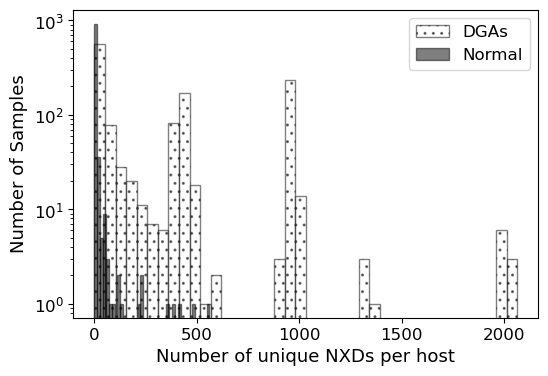

In [4]:
import random
import matplotlib.pyplot as plt
from matplotlib import *

matplotlib.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(6,4))

pyplot.hist(dga_nxds_set, bins=40, alpha=0.5, label='DGAs', color='white', edgecolor='black', hatch='..', log=True)
pyplot.hist(ctu_nxds_set, bins=40, alpha=0.5, label='Normal', color='black', edgecolor='black', )
pyplot.legend(loc='upper right')
pyplot.xlabel('Number of unique NXDs per host', fontsize=13)
pyplot.ylabel('Number of Samples', fontsize=13)

plt.savefig('nb_uniq_nxds_final.pdf', bbox_inches='tight',  dpi=150)  
pyplot.show()

